# Problem 1: Calculating $\pi$ with Monte Carlo

The aim of this first problem is to write a code that calculates the value of $\pi$ as discussed in the lecture. Recall that the idea is to place a circle of radius 1 inside a square of length 2. "Stones" are then randomly thrown into the square and the ones that land in the circle are counted. As more stones are thrown $\pi$ can be approximated by $4 N_c/N_s$. Effectively, this amounts to:


- Generate $x$ and $y$ random variables on (-1,+1)
- Check the condition $x^2 + y^2 < 1$ 
- $N_c = N_c +1$ if the above condition is true 
- $N_s = N_s + 1$ always
- Calculate $\pi$

Goal: show that the Monte Carlo error for the estimatation of $\pi$ goes as $1/\sqrt{N}$, where $N$ is the number of Monte Carlo runs. 

In [61]:
for i in arange(5,25):
    N=2**i
    x=-1+2*rand(N)
    y=-1+2*rand(N)
    N_in=count_nonzero((x**2+y**2)<1)
    area=4*N_in/N
    plot(N,abs(area-pi),"bo")

# Problem 2: Markov Chain Monte Carlo for the Ising Model 

The aim of this example is to study the two-dimensional Ising Model using a Monte Carlo algorithm and to see whether we can find evidence for a phase transition even though we will deal with a finite system. Recall the discussion of the Ising Model from the lecture.

To practically solve this problem in Python, for the moment we will only deal with with the **(i)** setup of the problem and **(ii)** how to implement the Metropolis algorithm  

### (i) Setup up a Class for the Ising Model 

To start we can establish a class for configuring the Ising Model. The constructor (__init__) should take T (temperature),J (interaction),L (lattice size) which will completely define the lattice structure. The spins can then take random values of $\pm 1$ on the $L \times L$ lattice. 

In addition to the constructor, the class should have energy and magenetisation methods that return the energy and magnetisation of the chosen Configuration. 

To that end, the class should have the following general structure:

To make sure that the class that you have written is working the $\pm 1$ elements of the can be converted to an image and then plotted with Matplotlib: 

Calling:
$\mathbb{J}$ the coupling matrix, $\mathbb{S}$ the spin matrix, The energy is  the convolution of matrix $\mathbb{S}$ with $\mathbb{J}$
$$
E=\frac{1}{2} \left[\mathbb{S}*\mathbb{J}\right]
$$
where $\frac{1}{2}$ avoids double counting

In [1]:
class Ising(object):
    def __init__(self,T,J,N):
        self.T=T
        self.J=J
        #self.L=L
        self.N=N# dimension of the problem
        self.spin=2*(rand(self.N,self.N)>0.5)-1 # matrix of spin
        self.couplings=J*[[0,1,0],[1,0,1],[0,1,0]]
        self.mask=array([[(i+j)%2 for i in arange(0,N)] for j in arange (0,N)])#this is the chessboard pattern
        self.E=self.energy2()
        #self.spin=reshape(append(self.spin,self.spin[:,0]),(self.N,self.N+1))
        #self.spin=reshape(append(self.spin,self.spin[0,:]),(self.N+1,self.N+1))
    def energy(self):
        E=0
        S=self.spin
        N=self.N
        for i in arange(0,N):
            for j in arange(0,N):
                E+=self.J*(S[i,j]*S[i,(j+1)%N]+S[i,j]*S[i,j-1]+S[i,j]*S[i-1,j]+S[i,j]*S[(i+1)%N,j])
        #self.E=E
        return E
    def energy2(self):       
        return -0.5*sum(self.spin*convolve2d(self.spin,self.couplings,"same",boundary="wrap")) #make the matrix product between spin matrix and the coupling matrix
    def energy_difference(self,i,j):# after - before
        S=self.spin
        N=self.N
        #print(i)
        submatrix=S[[i-1,i,(i+1)%N]][:,[j-1,j,(j+1)%N]]# select the submatrix of size 3  centered in  (i,j) 
        return submatrix[1,1]*convolve2d(submatrix,self.couplings,"valid") # the energy difference  is twice the energy term, with the  opposite sign
    def move(self):
        i,j=randint(0,self.N,2)
        delta_E= self.energy_difference(i,j)
        if delta_E<0: self.spin[i,j]*=-1
        elif random_sample()<exp(-delta_E/self.T):
             self.spin[i,j]*=-1
        return self.spin
        
        
    def magnetisation(self):
        return mean(self.spin) #total magnetization
        
    def show(self):
        imshow(self.spin)

In [2]:
from pylab import *
from scipy.signal import convolve2d
%matplotlib inline

model = Ising(T=1.2,J=1,N=20)
model.show()
k=0
dati=[]
while k<10:
    dati+=[model.magnetisation()]
    model.move()
    k+=1
figure()
model.show()
figure()
plot(dati)

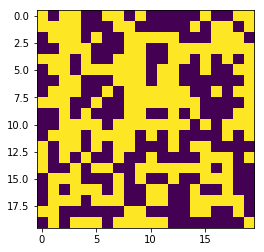

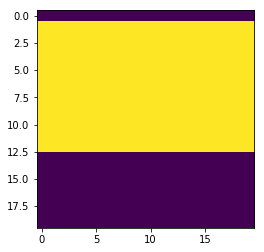

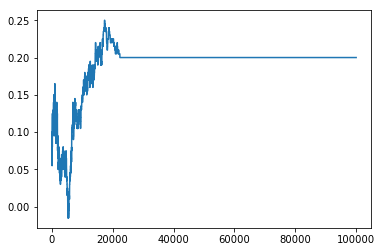

In [3]:
model = Ising(T=0.1,J=1,N=20)
model.show()
k=0
dati=[]
while k<100000:
    dati+=[model.magnetisation()]
    model.move()
    k+=1
figure()
model.show()
figure()
plot(dati)

array([[22, 22, 31, 34],
       [52, 50, 61, 65],
       [61, 55, 70, 67],
       [28, 27, 37, 42]])

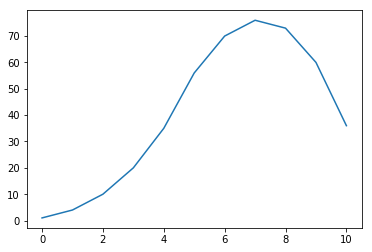

In [101]:
plot(convolve([1,2,3,4,5,6],[1,2,3,4,5,6],"full"))
convolve2d([[2,3,5,7],[11,13,17,20],[17,19,23,30],[1,2,4,7]],[[0,1,0],[1,0,1],[0,1,0]],"same",boundary="wrap")

### (ii) The Metropolis Move 

The Metroplis Monte Carlo move should take an a specific Ising configuration and propose a move to another configuration according to the Metropolis Algorithm. To that end, a function can be written that computes the energy difference between the new and old configurations. The function should return a configuration decided by the acceptance criteria of the Metroplis algorithm.

The rest of the problem will be discussed in the nest session.

In [1]:
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [78]:
N=10

array([[ 1,  1, -1,  1,  1, -1, -1, -1, -1,  1],
       [-1, -1,  1,  1,  1, -1, -1, -1,  1, -1],
       [-1, -1,  1, -1,  1, -1, -1,  1, -1, -1],
       [ 1,  1, -1, -1,  1,  1, -1,  1,  1, -1],
       [-1, -1,  1,  1,  1, -1, -1, -1,  1, -1],
       [-1, -1,  1,  1, -1,  1,  1, -1, -1,  1],
       [ 1, -1,  1, -1,  1, -1,  1,  1,  1,  1],
       [-1, -1, -1, -1,  1,  1,  1,  1, -1, -1],
       [ 1,  1,  1,  1, -1, -1, -1,  1, -1,  1],
       [ 1,  1, -1,  1,  1, -1, -1,  1, -1,  1]])

In [89]:
E=0
for i in arange(0,N):
    for j in arange(0,N):
        E+=A[i%,j]*A[i,j+1]+A[i,j]*A[i,j-1]+A[i,j]*A[i-1,j]+A[i,j]*A[i+1,j]

SyntaxError: invalid syntax (<ipython-input-89-613b3a549fdb>, line 4)

In [79]:
for T in linspace(-10,10):
    Is=Ising(T,1,1,10)
    plot(T,Is.magnetisation(),"o")

TypeError: __init__() takes 4 positional arguments but 5 were given

In [86]:
sum(A)

19

In [57]:
reshape(append(A,A[:,0]),(3,4))

array([[ 1, -1, -1,  1],
       [ 1, -1, -1, -1],
       [-1,  1,  1, -1]])

In [337]:
A=reshape(arange(0,25),(5,5))
print(A)
B=A[[3,4,0]][:,[-1,0,1]]
print(B)
convolve2d(B,J,"valid")*B[1,1]
#shape(A[[J]])

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
[[19 15 16]
 [24 20 21]
 [ 4  0  1]]


array([[1200]])

In [355]:
print(A)
i,j=randint(0,4+1,2)
print(i,j)
A[i,j]


[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
2 4


14

In [31]:
arange(-1,10)+1%4

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [94]:
sum(array([[1,1,1],[2,2,2],[3,3,3]])*array([[1,1,1],[2,2,2],[3,3,3]]))

42

In [3]:
convolve2d?

In [10]:
class Spin_Glass(object):
    def __init__(self,T,J,N):
        self.T=T
        self.J=J
        #self.L=L
        self.N=N# dimension of the problem
        self.spin=2*(rand(self.N,self.N)>0.5)-1 # matrix of spin
        self.couplings=J*(2*rand(self.N,self.N)-1)
        self.mask=array([[(i+j)%2 for i in arange(0,N)] for j in arange (0,N)])#this is the chessboard pattern
        self.E=self.energy2()
        #self.spin=reshape(append(self.spin,self.spin[:,0]),(self.N,self.N+1))
        #self.spin=reshape(append(self.spin,self.spin[0,:]),(self.N+1,self.N+1))
    def energy(self):
        E=0
        S=self.spin
        N=self.N
        for i in arange(0,N):
            for j in arange(0,N):
                E+=self.J*(S[i,j]*S[i,(j+1)%N]+S[i,j]*S[i,j-1]+S[i,j]*S[i-1,j]+S[i,j]*S[(i+1)%N,j])
        #self.E=E
        return E
    def energy2(self):       
        return -0.5*sum(self.spin*convolve2d(self.spin,self.couplings,"same",boundary="wrap")) #make the matrix product between spin matrix and the coupling matrix
    def energy_difference(self,i,j):# after - before
        S=self.spin
        N=self.N
        J=self.couplings[[i-1,i,(i+1)%N]][:,[j-1,j,(j+1)%N]]
        #print(i)
        submatrix=S[[i-1,i,(i+1)%N]][:,[j-1,j,(j+1)%N]]# select the submatrix of size 3  centered in  (i,j) 
        return submatrix[1,1]*convolve2d(submatrix,J,"valid") # the energy difference  is twice the energy term, with the  opposite sign
    def move(self):
        i,j=randint(0,self.N,2)
        delta_E= self.energy_difference(i,j)
        if delta_E<0: self.spin[i,j]*=-1
        elif random_sample()<exp(-delta_E/self.T):
             self.spin[i,j]*=-1
        return self.spin
        
        
    def magnetisation(self):
        return mean(self.spin) #total magnetization
        
    def show(self):
        imshow(self.spin)

In [16]:
spin_glass=Spin_Glass(1,1,10)

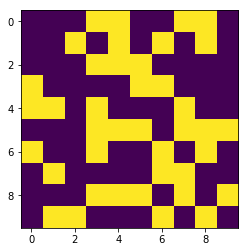

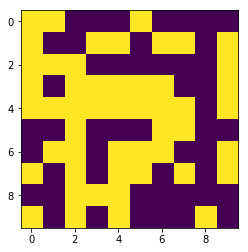

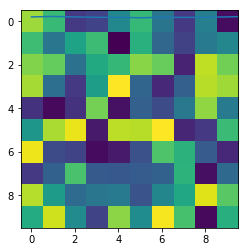

In [22]:
spin_glass.show()
k=0
dati=[]
while k<1000000:
    dati+=[spin_glass.magnetisation()]
    spin_glass.move()
    k+=1
figure()
spin_glass.show()
figure()
plot(dati)
imshow(spin_glass.couplings)

In [56]:
S=arange(0,36).reshape(6,6)
print(S)
print(S[row[::2,::2],col[::2,::2]])#even indexes
print(S[row[1::2,0::2],col[1::2,0::2]])#odd indexes
print(S[row[0::2,1::2],col[0::2,1::2]])#odd indexes
print(S[row[1::2,1::2],col[1::2,1::2]])#odd indexes

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]
 [30 31 32 33 34 35]]
[[ 0  2  4]
 [12 14 16]
 [24 26 28]]
[[ 6  8 10]
 [18 20 22]
 [30 32 34]]
[[ 1  3  5]
 [13 15 17]
 [25 27 29]]
[[ 7  9 11]
 [19 21 23]
 [31 33 35]]


In [41]:
A=append(S[row[1::2,0::2],col[1::2,0::2]],S[row[0::2,1::2],col[0::2,1::2]],axis=0)
#B=append(A,S[row[1::2,1::2],col[1::2,1::2]],axis=1)
A

array([[ 6,  8, 10],
       [18, 20, 22],
       [30, 32, 34],
       [ 1,  3,  5],
       [13, 15, 17],
       [25, 27, 29]])

In [52]:
mask=array([[(i+j)%2 for i in arange(0,N)] for j in arange (0,N)])
mask

array([[0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0]])

In [58]:
A=S
A[mask==0]*=-1

In [59]:
A

array([[  0,   1,  -2,   3,  -4,   5],
       [  6,  -7,   8,  -9,  10, -11],
       [-12,  13, -14,  15, -16,  17],
       [ 18, -19,  20, -21,  22, -23],
       [-24,  25, -26,  27, -28,  29],
       [ 30, -31,  32, -33,  34, -35]])